In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
import sklearn as sk
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
import warnings
import folium  
import catboost as cb

In [2]:
#import data
df=pd.read_csv(r'D:\NOTES\IBM DATA SCIENCE\final\Data-Collisions.csv')
df=pd.DataFrame(df)
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N


In [3]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [4]:
# check duplicated rows
print(df.duplicated().sum())

0


In [5]:
# use coordinates to build a map
dropxy=df.copy()
dropxy=dropxy[['SEVERITYCODE','X','Y']]
dropxy.isnull().sum()

SEVERITYCODE       0
X               5334
Y               5334
dtype: int64

In [6]:
#drop null in X,Y
dropxy.dropna(inplace=True)
dropxy


,SEVERITYCODE,X,Y
0,2,-122.323148,47.703140
1,1,-122.347294,47.647172
2,1,-122.334540,47.607871
3,1,-122.334803,47.604803
4,2,-122.306426,47.545739
...,...,...,...
194668,2,-122.290826,47.565408
194669,1,-122.344526,47.690924
194670,2,-122.306689,47.683047
194671,2,-122.355317,47.678734


In [35]:
for i in dropxy.columns:
    print(i)
    print(dropxy[i].value_counts())
    print(dropxy.dtypes)

SEVERITYCODE
1    132221
2     57118
Name: SEVERITYCODE, dtype: int64
SEVERITYCODE      int64
X               float64
Y               float64
dtype: object
X
-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64
SEVERITYCODE      int64
X               float64
Y               float64
dtype: object
Y
47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64
SEVERITYCODE      int64
X               float64
Y               float64
dtype: object


In [36]:
limit = 100
dropxy100 = dropxy.iloc[0:limit, :]
accidents = folium.map.FeatureGroup()
for lat,lng, in zip(dropxy100.Y,dropxy.X):
    accidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=4, # define how big you want the circle markers to be
            color='null',
            fill=True,
            fill_color='red',
            fill_opacity=1
        )
    )
seatle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=10)
seatle_map.add_child(accidents)


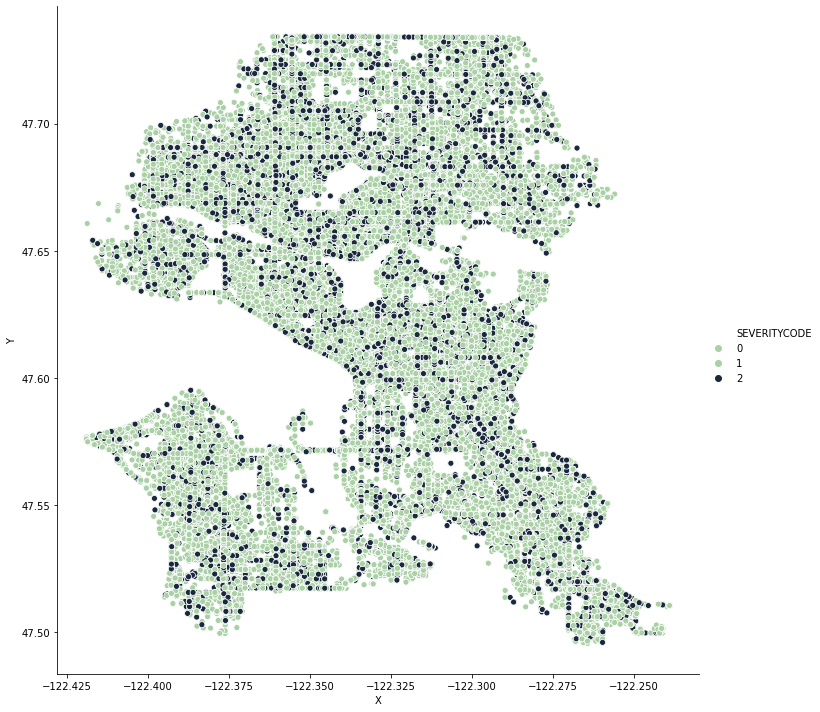

In [37]:
sns.relplot(x="X",y="Y",hue="SEVERITYCODE",palette="ch:r=-.5,l=.75",height=10,data=dropxy)

In [38]:
# find values for all series
for i in df.columns:
    print(i)
    print(df[i].value_counts())


SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
X
-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
              ... 
-122.322768      1
-122.288680      1
-122.405699      1
-122.323578      1
-122.343898      1
Name: X, Length: 23563, dtype: int64
Y
47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
            ... 
47.556705      1
47.709101      1
47.513899      1
47.565438      1
47.563521      1
Name: Y, Length: 23839, dtype: int64
OBJECTID
2047     1
1194     1
58550    1
64693    1
62644    1
        ..
96890    1
90745    1
92792    1
70263    1
2049     1
Name: OBJECTID, Length: 194673, dtype: int64
INCKEY
266238    1
81549     1
104088    1
126615    1
124566    1
         ..
164613    1
176899    1
178946    1
172801    1
295445    1
Name: INCKEY, Length: 194673, dtype: int64
COLDETKEY
266238    1
122129    1
111900    1
101659    1
99610     1
         ..
137750    1
13160

In [7]:
# useing variables that are needed
dfn=df[["SEVERITYCODE","WEATHER","ROADCOND","LIGHTCOND"]]
dfn_w=df[["SEVERITYCODE","WEATHER"]]
dfn_r=df[["SEVERITYCODE","ROADCOND"]]
dfn_l=df[["SEVERITYCODE","LIGHTCOND"]]
dfn


,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
...,...,...,...,...
194668,2,Clear,Dry,Daylight
194669,1,Raining,Wet,Daylight
194670,2,Clear,Dry,Daylight
194671,2,Clear,Dry,Dusk


In [8]:
# find null
disn=dfn.isnull().sum()
disn


SEVERITYCODE       0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [9]:
# examine values for all series
for i in dfn.columns:
    print(i)
    print(dfn[i].value_counts())

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
WEATHER
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
ROADCOND
Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
LIGHTCOND
Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off  

In [10]:
# change unknown to null
dfn.replace('Unknown',np.nan,inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [11]:
# find null including 'unknown',disn=data is null
disn=dfn.isnull().sum()
disn

SEVERITYCODE        0
WEATHER         20172
ROADCOND        20090
LIGHTCOND       18643
dtype: int64

In [12]:
# find null/total
disnp=pd.concat([disn,disn/len(dfn)],axis=1)
disnp.columns=["null count","null percentage"]
display(disnp)

,null count,null percentage
SEVERITYCODE,0,0.000000
WEATHER,20172,0.103620
ROADCOND,20090,0.103199
LIGHTCOND,18643,0.095766


In [13]:
# change null to mode
dfn['WEATHER'].replace(np.nan,'Clear',inplace=True)
dfn['ROADCOND'].replace(np.nan,'Dry',inplace=True)
dfn['LIGHTCOND'].replace(np.nan,'Daylight',inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [14]:
#find 'others' in 'weather','roadcond','lightcond'
dfn_wo=dfn_w[dfn_w['WEATHER']=='Other']
dfn_ro=dfn_r[dfn_r['ROADCOND']=='Other']
dfn_lo=dfn_l[dfn_l['LIGHTCOND']=='Other']
dfn_to=pd.concat([dfn_wo,dfn_ro,dfn_lo],axis=0)
#dfn_to=dfn_to.reset_index(drop=True)
dfn_to
len(dfn_to)

#or use for loop
#find all column value = 'Other'
#diso=pd.DataFrame()

#for i in dfn.columns:
#    dison=dfn.loc[dfn[i]=='Other']
#    diso=pd.concat([diso,dison],axis=0)
#print(diso)

1199

In [15]:
# find 'others'/total,diso=data is other,disopercentage
others={'count other':[len(dfn_to)],'other percentage':[len(dfn_to)/len(dfn)]}
disop=DataFrame(others)
disop

,count other,other percentage
0,1199,0.006159


In [16]:
#delete 'Other'
dfn_toindex = dfn_to.index
dfn.drop(dfn_toindex,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
dfn

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
...,...,...,...,...
194668,2,Clear,Dry,Daylight
194669,1,Raining,Wet,Daylight
194670,2,Clear,Dry,Daylight
194671,2,Clear,Dry,Dusk


In [204]:
dfn

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight
...,...,...,...,...
194668,2,Clear,Dry,Daylight
194669,1,Raining,Wet,Daylight
194670,2,Clear,Dry,Daylight
194671,2,Clear,Dry,Dusk


In [18]:
# examine values for all series
for i in dfn.columns:
    print(i)
    print(dfn[i].value_counts())

SEVERITYCODE
1    135525
2     57981
Name: SEVERITYCODE, dtype: int64
WEATHER
Clear                       131128
Raining                      33058
Overcast                     27659
Snowing                        901
Fog/Smog/Smoke                 566
Sleet/Hail/Freezing Rain       109
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
ROADCOND
Dry               143758
Wet                47320
Ice                 1189
Snow/Slush           990
Standing Water       112
Sand/Mud/Dirt         74
Oil                   63
Name: ROADCOND, dtype: int64
LIGHTCOND
Daylight                    134082
Dark - Street Lights On      48330
Dusk                          5877
Dawn                          2490
Dark - No Street Lights       1526
Dark - Street Lights Off      1192
Dark - Unknown Lighting          9
Name: LIGHTCOND, dtype: int64


In [19]:
#Imbalanced Data
dfn['SEVERITYCODE'].value_counts()


1    135525
2     57981
Name: SEVERITYCODE, dtype: int64

In [20]:
#Majority and minority classes
dfn_majority=dfn[dfn["SEVERITYCODE"]==1]
dfn_minority=dfn[dfn["SEVERITYCODE"]==2]
dfn_majority
dfn_minority

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
4,2,Raining,Wet,Daylight
7,2,Clear,Dry,Daylight
9,2,Clear,Dry,Daylight
14,2,Clear,Dry,Dark - Street Lights On
...,...,...,...,...
194663,2,Raining,Wet,Daylight
194666,2,Clear,Wet,Daylight
194668,2,Clear,Dry,Daylight
194670,2,Clear,Dry,Daylight


In [21]:
#Downsample majority
dfn_majority_down = resample(dfn_majority,replace=False,n_samples=len(dfn_minority),random_state=9)
dfn_majority_down

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
132837,1,Raining,Wet,Dark - Street Lights On
136682,1,Overcast,Wet,Dusk
55780,1,Clear,Dry,Daylight
166496,1,Clear,Dry,Daylight
165905,1,Clear,Dry,Daylight
...,...,...,...,...
131134,1,Raining,Wet,Daylight
154960,1,Clear,Dry,Daylight
52609,1,Clear,Dry,Daylight
146295,1,Clear,Dry,Dark - Street Lights On


In [70]:
#create new dataset, Balanced df
bdf=[dfn_majority_down,dfn_minority]
bdf=pd.concat(bdf)
bdf['SEVERITYCODE'].value_counts()

2    57981
1    57981
Name: SEVERITYCODE, dtype: int64

In [69]:
# # from sklearn.preprocessing import OneHotEncoder
# # X_1 = bdf['WEATHER'].values.reshape(-1, 1)
# # enc = OneHotEncoder(categories='auto').fit(X_1) 

# # XW=enc.transform(X_1).toarray()
# # XW=pd.DataFrame(XW)
# # XW
# X_2 = bdf['ROADCOND'].values.reshape(-1, 1)
# enc = OneHotEncoder(categories='auto').fit(X_2) 

# XR=enc.transform(X_2).toarray()
# XR
# X_3 = bdf['LIGHTCOND'].values.reshape(-1, 1)
# enc = OneHotEncoder(categories='auto').fit(X_3) 

# XL=enc.transform(X_3).toarray()
# XL

In [71]:
# 2.3.2.	Turning categorical variables into quantitative variables
wd_v=pd.get_dummies(bdf['WEATHER'])
wd_v


,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
132837,0,0,0,0,0,1,0,0,0
136682,0,0,0,1,0,0,0,0,0
55780,0,1,0,0,0,0,0,0,0
166496,0,1,0,0,0,0,0,0,0
165905,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
194663,0,0,0,0,0,1,0,0,0
194666,0,1,0,0,0,0,0,0,0
194668,0,1,0,0,0,0,0,0,0
194670,0,1,0,0,0,0,0,0,0


In [72]:
#change weather
bdf = pd.concat([bdf, wd_v], axis=1)
bdf.drop('WEATHER',axis = 1, inplace = True)
bdf

,SEVERITYCODE,ROADCOND,LIGHTCOND,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
132837,1,Wet,Dark - Street Lights On,0,0,0,0,0,1,0,0,0
136682,1,Wet,Dusk,0,0,0,1,0,0,0,0,0
55780,1,Dry,Daylight,0,1,0,0,0,0,0,0,0
166496,1,Dry,Daylight,0,1,0,0,0,0,0,0,0
165905,1,Dry,Daylight,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194663,2,Wet,Daylight,0,0,0,0,0,1,0,0,0
194666,2,Wet,Daylight,0,1,0,0,0,0,0,0,0
194668,2,Dry,Daylight,0,1,0,0,0,0,0,0,0
194670,2,Dry,Daylight,0,1,0,0,0,0,0,0,0


In [73]:
# do the same for roadcond
rd_v=pd.get_dummies(bdf['ROADCOND'])
rd_v

,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
132837,0,0,0,0,0,0,1
136682,0,0,0,0,0,0,1
55780,1,0,0,0,0,0,0
166496,1,0,0,0,0,0,0
165905,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
194663,0,0,0,0,0,0,1
194666,0,0,0,0,0,0,1
194668,1,0,0,0,0,0,0
194670,1,0,0,0,0,0,0


In [74]:
# change roadcond
bdf = pd.concat([bdf, rd_v], axis=1)
bdf.drop('ROADCOND',axis = 1, inplace = True)
bdf

,SEVERITYCODE,LIGHTCOND,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet
132837,1,Dark - Street Lights On,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
136682,1,Dusk,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
55780,1,Daylight,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166496,1,Daylight,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
165905,1,Daylight,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,2,Daylight,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
194666,2,Daylight,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
194668,2,Daylight,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
194670,2,Daylight,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [75]:
#do the same for lightcond
ld_v=pd.get_dummies(bdf['LIGHTCOND'])
ld_v

,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
132837,0,0,1,0,0,0,0
136682,0,0,0,0,0,0,1
55780,0,0,0,0,0,1,0
166496,0,0,0,0,0,1,0
165905,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
194663,0,0,0,0,0,1,0
194666,0,0,0,0,0,1,0
194668,0,0,0,0,0,1,0
194670,0,0,0,0,0,1,0


In [76]:
#change lightcond
bdf = pd.concat([bdf, ld_v], axis=1)
bdf.drop('LIGHTCOND',axis = 1, inplace = True)
bdf

,SEVERITYCODE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
132837,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
136682,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
55780,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
166496,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
165905,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194663,2,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
194666,2,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
194668,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
194670,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [158]:
#new dataframe
print(bdf.columns)
print(bdf.shape)

Index(['SEVERITYCODE', 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke',
       'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil',
       'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk'],
      dtype='object')
(115962, 24)


In [106]:
# initialization, define X
bdf_x=bdf.drop('SEVERITYCODE',axis=1)
X=np.asarray(bdf_x)
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1]], dtype=uint8)

In [105]:
# initialization, define Y
Y=np.asarray(bdf['SEVERITYCODE'])
Y

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [104]:
# train70%
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=99)
print('Train set:',X_train.shape, y_train.shape)
print('Test set:',X_test.shape, y_test.shape)

Train set: (81173, 23) (81173,)
Test set: (34789, 23) (34789,)


In [114]:
# lr = LinearRegression()
# lr.fit(X_train,y_train)
# print(lr.score(X_train,y_train))
# print(lr.score(X_test,y_test))

0.004012323744734592
0.0017741334110544793


In [117]:
# normalization
s = StandardScaler()
X_train_scale = s.fit_transform(X_train)
X_test_scale = s.transform(X_test)
X_train_scale

array([[-0.01530107,  0.70421448, -0.05535852, ..., -0.11796075,
         0.66479142, -0.18107437],
       [-0.01530107,  0.70421448, -0.05535852, ..., -0.11796075,
         0.66479142, -0.18107437],
       [-0.01530107,  0.70421448, -0.05535852, ..., -0.11796075,
         0.66479142, -0.18107437],
       ...,
       [-0.01530107, -1.42002193, -0.05535852, ..., -0.11796075,
        -1.50423121, -0.18107437],
       [-0.01530107,  0.70421448, -0.05535852, ..., -0.11796075,
         0.66479142, -0.18107437],
       [-0.01530107, -1.42002193, -0.05535852, ..., -0.11796075,
         0.66479142, -0.18107437]])

In [116]:
# lr.fit(X_train_scale,y_train)
# print(lr.score(X_train_scale,y_train))
# print(lr.score(X_test_scale,y_test))

0.004013361046705133
0.0016984427918367295


In [115]:
# Feature Engineering using RFECV
# rfecv = RFECV(estimator=lr, step=1, cv=5, n_jobs=-1, scoring="r2")
# rfecv.fit(X_train,Y_train)
# print(rfecv.n_features)

AttributeError: 'RFECV' object has no attribute 'n_features'

In [160]:
# Using KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_scale,y_train)
knn
ky_hat = knn.predict(X_test_scale)
print(classification_report(y_test,ky_hat))

              precision    recall  f1-score   support

           1       0.51      0.24      0.32     17471
           2       0.50      0.77      0.61     17318

    accuracy                           0.50     34789
   macro avg       0.51      0.50      0.47     34789
weighted avg       0.51      0.50      0.46     34789



In [139]:
# # Using KNN
# knn = KNeighborsClassifier(n_neighbors=5,weights="distance").fit(X_train_scale,y_train)
# knn
# ky_hat = knn.predict(X_test_scale)
# print(classification_report(y_test,ky_hat))

              precision    recall  f1-score   support

           1       0.51      0.24      0.32     17471
           2       0.50      0.77      0.61     17318

    accuracy                           0.50     34789
   macro avg       0.51      0.50      0.47     34789
weighted avg       0.51      0.50      0.46     34789



In [159]:
# # Using KNN
# knn = KNeighborsClassifier(n_neighbors=9).fit(X_train_scale,y_train)
# knn
# ky_hat = knn.predict(X_test_scale)
# print(classification_report(y_test,ky_hat))

              precision    recall  f1-score   support

           1       0.51      0.22      0.31     17471
           2       0.50      0.78      0.61     17318

    accuracy                           0.50     34789
   macro avg       0.50      0.50      0.46     34789
weighted avg       0.50      0.50      0.46     34789



In [131]:
# Using Decision Tree
decisiontree = DecisionTreeClassifier(criterion="entropy").fit(X_train_scale,y_train)
dy_hat = decisiontree.predict(X_test_scale)
print(classification_report(y_test,dy_hat))

              precision    recall  f1-score   support

           1       0.51      0.66      0.58     17471
           2       0.52      0.37      0.44     17318

    accuracy                           0.52     34789
   macro avg       0.52      0.52      0.51     34789
weighted avg       0.52      0.52      0.51     34789



In [129]:
# # Using Decision Tree
# decisiontree = DecisionTreeClassifier(criterion="entropy",max_depth=7).fit(X_train_scale,y_train)
# dy_hat = decisiontree.predict(X_test_scale)
# print(classification_report(y_test,dy_hat))

              precision    recall  f1-score   support

           1       0.51      0.66      0.58     17471
           2       0.52      0.38      0.44     17318

    accuracy                           0.52     34789
   macro avg       0.52      0.52      0.51     34789
weighted avg       0.52      0.52      0.51     34789



In [136]:
# Using Logistic Regression
logr = LogisticRegression(C=1, solver='liblinear').fit(X_train_scale,y_train)
ly_hat = logr.predict(X_test_scale)
print(classification_report(y_test,dy_hat))

              precision    recall  f1-score   support

           1       0.51      0.66      0.58     17471
           2       0.52      0.37      0.44     17318

    accuracy                           0.52     34789
   macro avg       0.52      0.52      0.51     34789
weighted avg       0.52      0.52      0.51     34789



In [138]:
# # Using Logistic Regression
# logr = LogisticRegression(C=6, solver='liblinear').fit(X_train_scale,y_train)
# ly_hat = logr.predict(X_test_scale)
# print(classification_report(y_test,dy_hat))

              precision    recall  f1-score   support

           1       0.51      0.66      0.58     17471
           2       0.52      0.37      0.44     17318

    accuracy                           0.52     34789
   macro avg       0.52      0.52      0.51     34789
weighted avg       0.52      0.52      0.51     34789



In [161]:
# Result Evaluation for KNN
jaccard_score(y_test,ky_hat)

0.19284813967601885

In [162]:
# Result Evaluation for Decision Tree
jaccard_score(y_test,dy_hat)

0.4049478706485245

In [163]:
# Result Evaluation for Logistic Regression
jaccard_score(y_test,ly_hat)

0.40503869121232466